# Homework 1 - Time Series Plots

Kimberlee Wong

Github Repo: https://github.com/kimberleewong/eds296-HW1

### Import Libraries and Data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs
import numpy as np

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')


In [3]:
# Search through catalog, find all historical simulations
# ("activity_id=CMIP", "experiment_id=historical")
res = catalog.search(activity_id="CMIP", experiment_id="historical")

# Convert to a data frame
res_df = res.df

# Get unique model names in the set of search results
models = res_df.source_id.unique()

# Print list of model names
print(models)

['GFDL-CM4' 'GFDL-ESM4' 'IPSL-CM6A-LR' 'GISS-E2-1-G' 'CNRM-CM6-1'
 'BCC-CSM2-MR' 'BCC-ESM1' 'CNRM-ESM2-1' 'MIROC6' 'AWI-CM-1-1-MR'
 'MRI-ESM2-0' 'CESM2-WACCM' 'CanESM5' 'CESM2' 'SAM0-UNICON' 'GISS-E2-1-H'
 'UKESM1-0-LL' 'EC-Earth3' 'CanESM5-CanOE' 'INM-CM4-8' 'EC-Earth3-Veg'
 'INM-CM5-0' 'HadGEM3-GC31-LL' 'MPI-ESM-1-2-HAM' 'NESM3' 'CAMS-CSM1-0'
 'MPI-ESM1-2-LR' 'MPI-ESM1-2-HR' 'E3SM-1-0' 'MCM-UA-1-0' 'NorESM2-LM'
 'GISS-E2-1-G-CC' 'FGOALS-g3' 'FGOALS-f3-L' 'MIROC-ES2L' 'KACE-1-0-G'
 'NorCPM1' 'CNRM-CM6-1-HR' 'KIOST-ESM' 'NorESM2-MM' 'ACCESS-CM2'
 'FIO-ESM-2-0' 'ACCESS-ESM1-5' 'CESM2-FV2' 'CESM2-WACCM-FV2' 'GISS-E2-2-H'
 'E3SM-1-1' 'HadGEM3-GC31-MM' 'IITM-ESM' 'CIESM' 'E3SM-1-1-ECA'
 'AWI-ESM-1-1-LR' 'EC-Earth3-Veg-LR' 'TaiESM1' 'CAS-ESM2-0' 'CMCC-CM2-SR5'
 'EC-Earth3-AerChem' 'IPSL-CM5A2-INCA' 'CMCC-CM2-HR4' 'EC-Earth3P-VHR'
 'EC-Earth3-CC' 'CMCC-ESM2' 'MIROC-ES2H' 'ICON-ESM-LR' 'IPSL-CM6A-LR-INCA']


In [4]:
# Specify search terms to query catalog for CanESM5 data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id = ['CanESM5']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = 'r10i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon' 

# variable_id: which climate variable do you want? Here we want surface air temperature
variable_id = 'tas' 

In [5]:
# Specify search terms to query catalog for CESM2 data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id2 = ['CESM2']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = 'r10i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon' 

# variable_id: which climate variable do you want? Here we want surface air temperature
variable_id = 'tas' 

In [6]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp585,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
2,ScenarioMIP,CCCma,CanESM5,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
3,ScenarioMIP,CCCma,CanESM5,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
4,ScenarioMIP,CCCma,CanESM5,ssp245,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [7]:
# Search through catalog, store results in "res" variable
res2 = catalog.search(activity_id=activity_ids, source_id=source_id2, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res2.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190313
1,ScenarioMIP,NCAR,CESM2,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
2,ScenarioMIP,NCAR,CESM2,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
3,ScenarioMIP,NCAR,CESM2,ssp245,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
4,ScenarioMIP,NCAR,CESM2,ssp585,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528


In [8]:
# Read in just the historical data files
hist_data = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})
hist_data2 = xr.open_zarr(res2.df['zstore'][0], storage_options={'anon': True})


# Print the data sets
print(hist_data)
print(hist_data2)

<xarray.Dataset>
Dimensions:    (lat: 64, bnds: 2, lon: 128, time: 1980)
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 64, 128), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            55f484f90aff0e32c5a8e92a42c6b9ae7ffe6224
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his10
   

In [9]:
# Get data for SSP370 for CanESM5
ssp370_data_1 = xr.open_zarr(res.df['zstore'][2], storage_options={'anon': True})

# Get data for SSP585 for CanESM5
ssp585_data_1 = xr.open_zarr(res.df['zstore'][1], storage_options={'anon': True})

# Get data for SSP370 for CESM2
ssp370_data_2 = xr.open_zarr(res2.df['zstore'][1], storage_options={'anon': True})

# Get data for SSP585 for CESM2
ssp585_data_2 = xr.open_zarr(res2.df['zstore'][4], storage_options={'anon': True})

# Print the contents
print(ssp370_data_1)
print(ssp585_data_1)
print(ssp370_data_2)
print(ssp585_data_2)

<xarray.Dataset>
Dimensions:    (lat: 64, bnds: 2, lon: 128, time: 1032)
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(516, 64, 128), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            24718c8346665b218729640ffe79d263b76456c4
    CCCma_parent_runid:          rc3.1-his10
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-s7010
    

In [10]:
# Define function to generate area weights
def weights(dat):
    # Calculate weighting factor = cosine of latitude
    coslat = np.cos(np.deg2rad(dat.lat))
    weight_factor = coslat / coslat.mean(dim='lat')
    
    # Weight all points by the weighting factor
    computed_weight = dat * weight_factor
    
    # Return the set of weights: this has dimension equal to that of the input data
    return computed_weight




Ethiopia's climate is diverse due to its varied topography. The highlands, where most people live, have a moderate tropical climate with cooler temperatures, supporting forests and agriculture. In contrast, the lowland regions are arid or semi-arid, experiencing much higher temperatures and sparse vegetation. The country has distinct rainy seasons, with the main rainy season occurring from June to September, but rainfall can be unpredictable across regions.

Climate change in Ethiopia is expected to lead to increased temperatures, more frequent droughts, and altered rainfall patterns, all of which will worsen water scarcity and threaten agriculture. Rising temperatures could worsen heatwaves, particularly in the lowlands, and lead to land degradation.

## Time Series of Ethiopia Using CANESM

In [11]:
# Concatenate historical and future projection data
canesm5_data = xr.concat([hist_data, ssp370_data_1], dim="time")

canesm5_data2 = xr.concat([hist_data, ssp585_data_1], dim="time")

In [12]:
# Define min/max bounds for region of interest (Ethipoia)
lat_min, lat_max = 3, 15
lon_min, lon_max = 33, 48

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_E_lat = (canesm5_data.lat >= lat_min) & (canesm5_data.lat <= lat_max)
tas_E_lon = (canesm5_data.lon >= lon_min) & (canesm5_data.lon <= lon_max)

# Define logical mask 2: True when lat/lon inside the valid ranges, False elsewhere
tas_E_lat2 = (canesm5_data2.lat >= lat_min) & (canesm5_data2.lat <= lat_max)
tas_E_lon2 = (canesm5_data2.lon >= lon_min) & (canesm5_data2.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_E = canesm5_data.where(tas_E_lat & tas_E_lon, drop=True)

tas_E2 = canesm5_data2.where(tas_E_lat & tas_E_lon, drop=True)

# Apply area weights
tas_E_weighted = weights(tas_E)
tas_E2_weighted = weights(tas_E2)

# Compute annually averaged, regionally averaged time series
tas_E_annual = tas_E_weighted.mean(dim=["lat", "lon"]).resample(time="1Y").mean()
tas_E2_annual = tas_E2_weighted.mean(dim=["lat", "lon"]).resample(time="1Y").mean()

# Save tas variable
tas_E_annual = tas_E_annual["tas"]
tas_E2_annual = tas_E2_annual["tas"]

# Convert time to datetime64 format
time = tas_E_annual.time.astype('datetime64[ns]')
time2 = tas_E2_annual.time.astype('datetime64[ns]')

### Plot Historical (CANESM5) with SSP370!

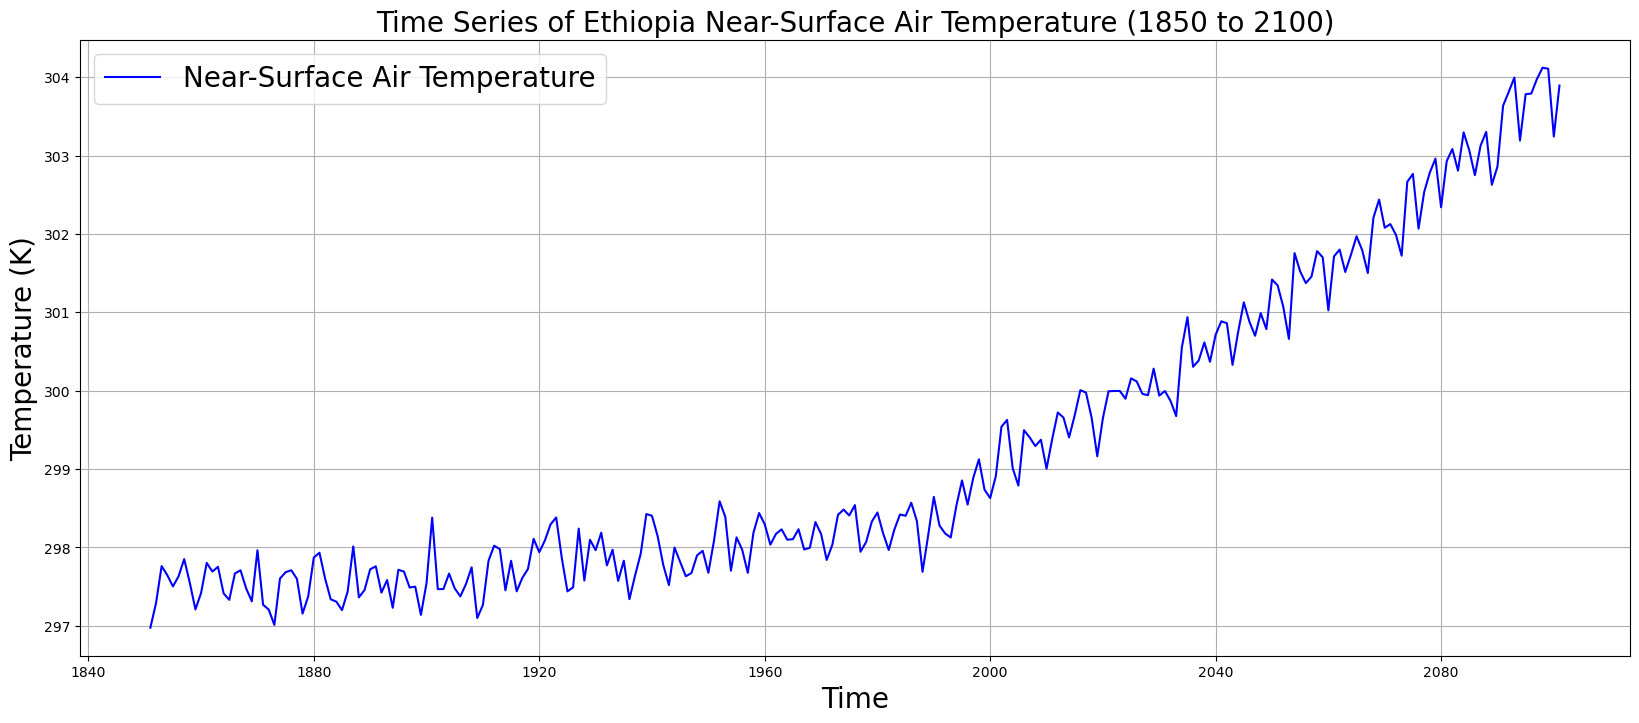

In [13]:
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the time series
ax.plot(time, tas_E_annual, label="Near-Surface Air Temperature", color="b")

# Add title and labels
ax.set_title("Time Series of Ethiopia Near-Surface Air Temperature (1850 to 2100)", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)

# Add legend
ax.legend(fontsize=20)

# Add grid
ax.grid()

plt.show()


### Plot Historical (CANESM5) with SSP585!

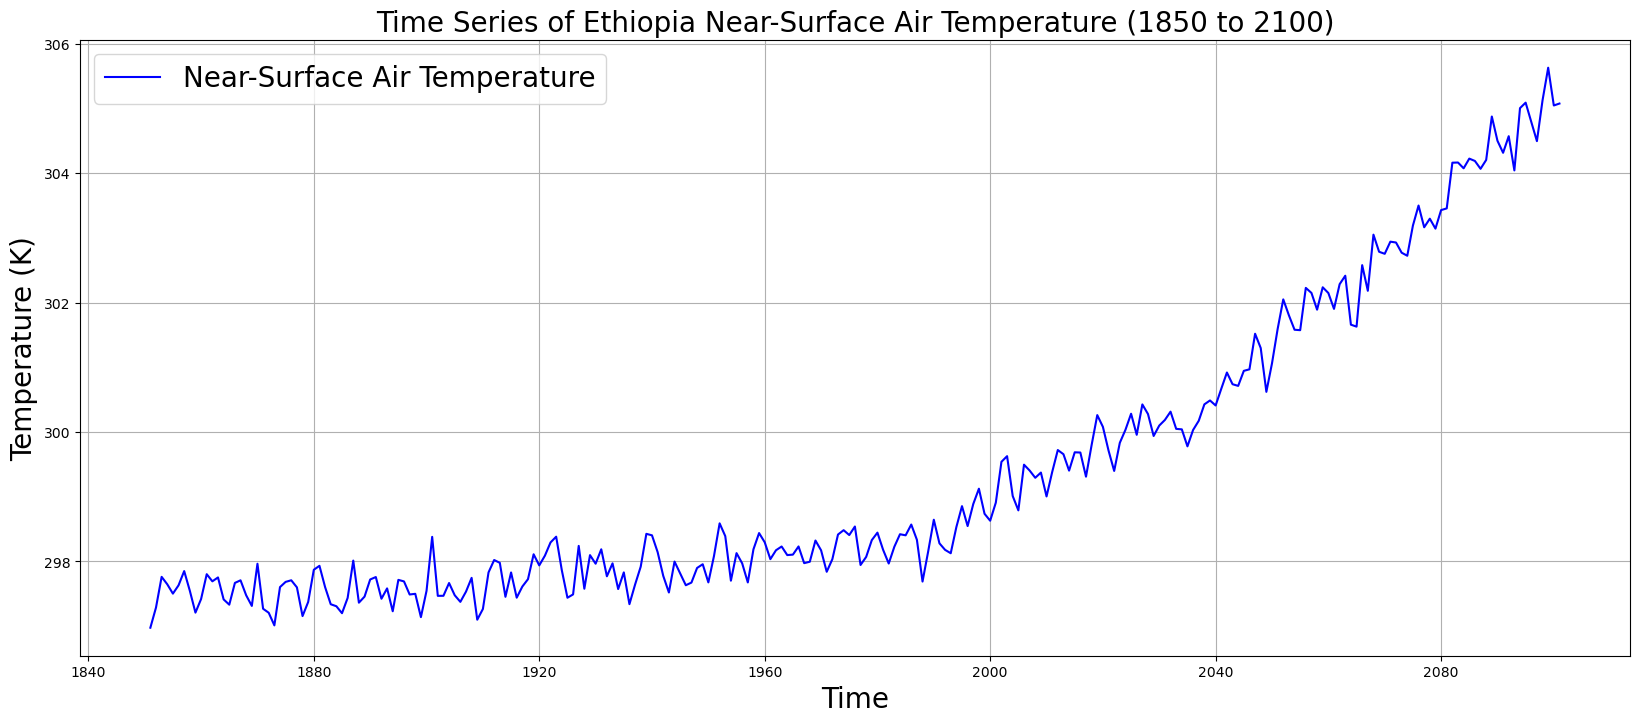

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the time series
ax.plot(time2, tas_E2_annual, label="Near-Surface Air Temperature", color="b")

# Add title and labels
ax.set_title("Time Series of Ethiopia Near-Surface Air Temperature (1850 to 2100)", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)

# Add legend
ax.legend(fontsize=20)

# Add grid
ax.grid()

plt.show()


## Time Series of Ethiopia Using CESM2

In [15]:
# Concatenate historical and future projection data
cesm2_data = xr.concat([hist_data2, ssp370_data_2], dim="time")

cesm2_data2 = xr.concat([hist_data2, ssp585_data_2], dim="time")

In [26]:
# Define min/max bounds for region of interest (Ethipoia)
lat_min, lat_max = 3, 15
lon_min, lon_max = 33, 48

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_E_lat_cesm2 = (cesm2_data.lat >= lat_min) & (cesm2_data.lat <= lat_max)
tas_E_lon_cesm2 = (cesm2_data.lon >= lon_min) & (cesm2_data.lon <= lon_max)

# Define logical mask 2: True when lat/lon inside the valid ranges, False elsewhere
tas_E_lat2_cesm2= (cesm2_data2.lat >= lat_min) & (cesm2_data2.lat <= lat_max)
tas_E_lon2_cesm2 = (cesm2_data2.lon >= lon_min) & (cesm2_data2.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_E_cesm2 = cesm2_data.where(tas_E_lat_cesm2 & tas_E_lat_cesm2, drop=True)

tas_E2_cesm2 = cesm2_data2.where(tas_E_lat2_cesm2 & tas_E_lon2_cesm2, drop=True)

# Apply area weights
tas_E_weighted_cesm2 = weights(tas_E_cesm2)
tas_E2_weighted_cesm2 = weights(tas_E2_cesm2)

# Compute annually averaged, regionally averaged time series
tas_E_annual_cesm2 = tas_E_weighted_cesm2.mean(dim=["lat", "lon"]).resample(time="1Y").mean()
tas_E2_annual_cesm2 = tas_E2_weighted_cesm2.mean(dim=["lat", "lon"]).resample(time="1Y").mean()

# Convert time to datetime64 format
time3 = tas_E_annual_cesm2.time.astype('datetime64[ns]')
time4 = tas_E2_annual_cesm2.time.astype('datetime64[ns]')

# Save tas variable
tas_E_annual_cesm2 = tas_E_annual_cesm2["tas"]
tas_E2_annual_cesm2 = tas_E2_annual_cesm2["tas"]


### Plot Historical (CESM2) with SSP370!

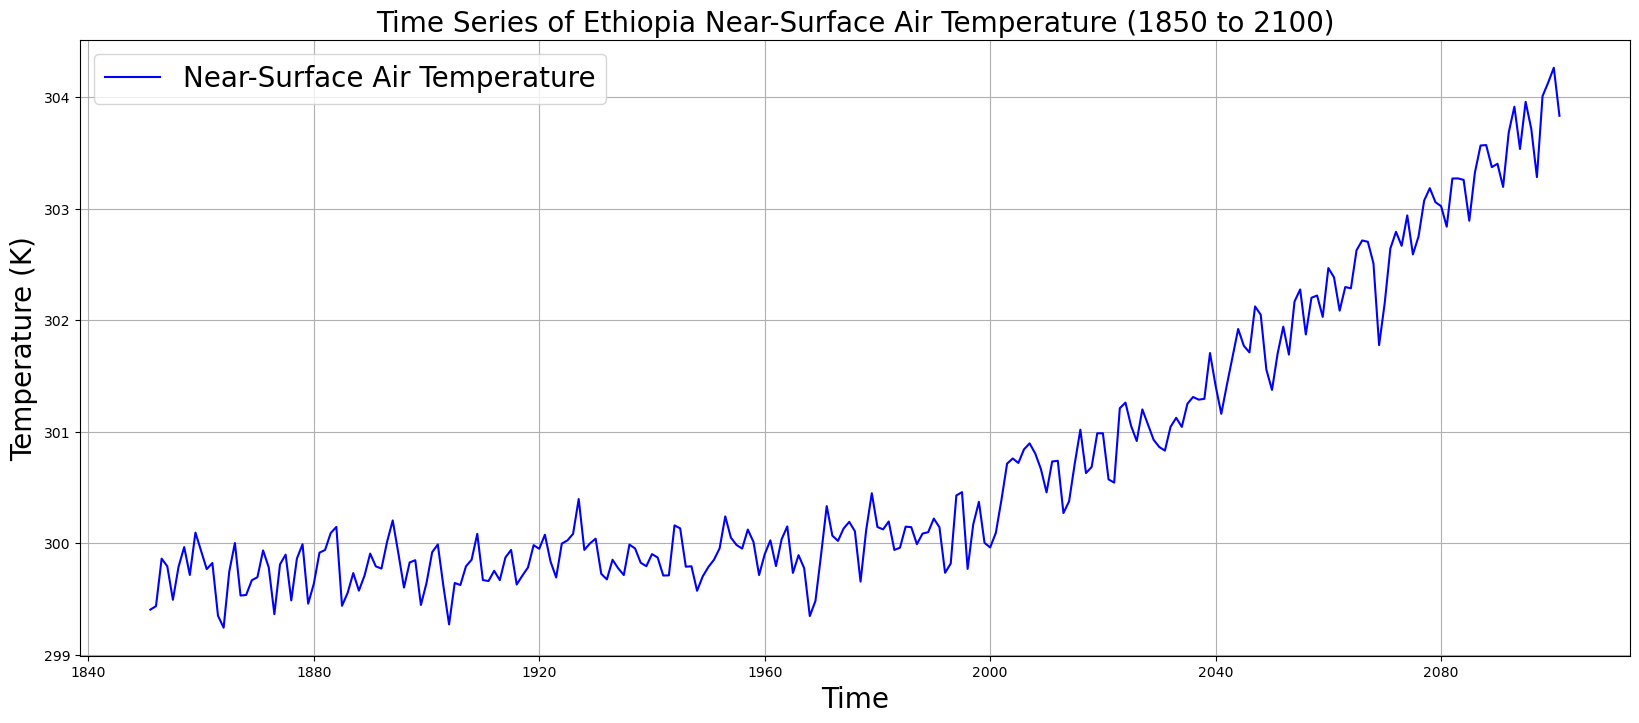

In [35]:
# Plot the time series
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(time3, tas_E_annual_cesm2, label="Near-Surface Air Temperature", color="b")

# Add title and labels
ax.set_title("Time Series of Ethiopia Near-Surface Air Temperature (1850 to 2100)", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)

# Add legend
ax.legend(fontsize=20)

# Add grid
ax.grid()

plt.show()

### Plot Historical (CESM2) with SSP585!

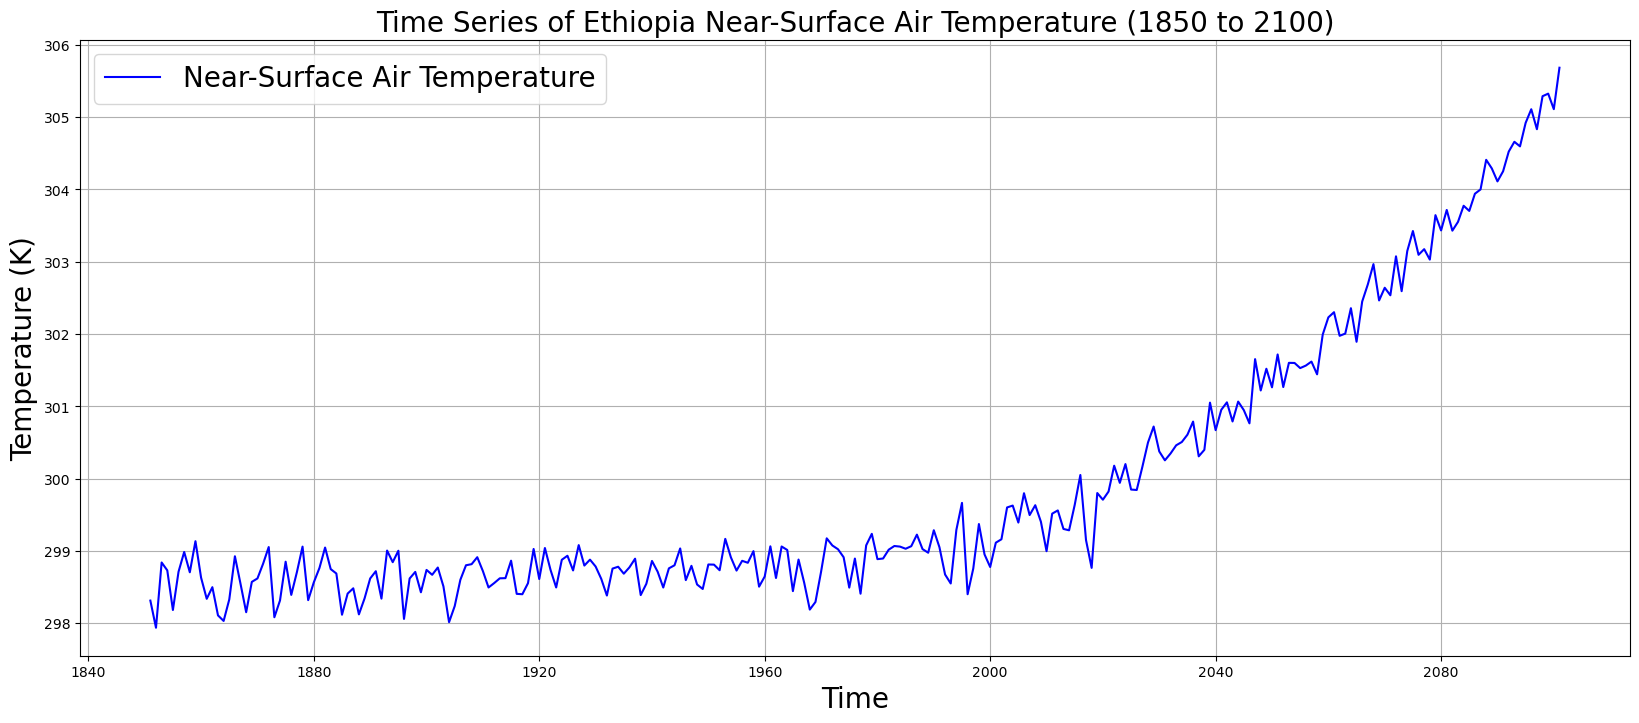

In [36]:
# Plot the time series
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(time4, tas_E2_annual_cesm2, label="Near-Surface Air Temperature", color="b")

# Add title and labels
ax.set_title("Time Series of Ethiopia Near-Surface Air Temperature (1850 to 2100)", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)

# Add legend
ax.legend(fontsize=20)

# Add grid
ax.grid()

plt.show()

As all four plots show increasing temperatures, these changes are likely to increase food insecurity, trigger migration from rural areas, and put pressure on urban infrastructure. From the graphs, it shows that temperatures remained relatively stable from 1850 until around the late 20th century, with small fluctuations around an average of approximately 298–299 K. But, starting around the year 2000, there is a consistent increase in temperature, with the predictions assuming an accelerating rapid increase toward the end of the century. By 2100, temperatures are projected to exceed 305 K, reflecting a significant warming trend.

This rapid increase in temperature could have serious implications for both human and ecological systems in Ethiopia. Rising temperatures may increase water scarcity, reduce agricultural productivity—especially in temperature-sensitive crops and increase the frequency of heat-related illnesses. Ecosystems may also be affected, as rising temperatures can disrupt habitat ranges, biodiversity, and the timing of seasonal events such as flowering and migration. Adaptation and mitigation strategies will be essential to address these challenges and build resilience for both people and the environment in the region.